EE 769, Spring 2020-21
Programming Assignment 1, **Question 1**

H R Sai Sumedh, 180070024, EE BTech


In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# PART A: Download datasets

In [191]:
from google.colab import files

data_upload = files.upload()

for file_name in data_upload.keys():
  print(f"{file_name} has been uploaded, with length {len(data_upload[file_name])}")


Saving winequality-red.csv to winequality-red (3).csv
Saving winequality-white.csv to winequality-white (3).csv
winequality-red.csv has been uploaded, with length 84199
winequality-white.csv has been uploaded, with length 264426


In [192]:
df_redwine = pd.read_csv('winequality-red.csv', sep=';')
df_whitewine = pd.read_csv('winequality-white.csv', sep=';')

# PART B: Explore, Visualize, Pre-process

In [193]:
display(df_redwine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [194]:
display(df_whitewine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Observations:

1. There are 12 columns, which includes 11 features and 1 output ('quality')
2. Red wine has 1599 samples, and white wine has 4898 samples

Look at the data types of each column

In [195]:
print(df_redwine.dtypes)
print(df_whitewine.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Thus, all features are float variables. Only the output variable 'quality' is an integer

Observe the number of unique values, NaN entries, and ranges of each column for **Red wine**

In [196]:
for col_red in df_redwine.columns.values: # for each column
  unique_entries = pd.unique(df_redwine[col_red]) # unique elements in a column
  print(f"The column '{col_red}' has range {unique_entries.min()} to {unique_entries.max()}, has {len(unique_entries)} unique entries, and {df_redwine[col_red].isnull().sum()} NaN values")

The column 'fixed acidity' has range 4.6 to 15.9, has 96 unique entries, and 0 NaN values
The column 'volatile acidity' has range 0.12 to 1.58, has 143 unique entries, and 0 NaN values
The column 'citric acid' has range 0.0 to 1.0, has 80 unique entries, and 0 NaN values
The column 'residual sugar' has range 0.9 to 15.5, has 91 unique entries, and 0 NaN values
The column 'chlorides' has range 0.012 to 0.611, has 153 unique entries, and 0 NaN values
The column 'free sulfur dioxide' has range 1.0 to 72.0, has 60 unique entries, and 0 NaN values
The column 'total sulfur dioxide' has range 6.0 to 289.0, has 144 unique entries, and 0 NaN values
The column 'density' has range 0.9900700000000001 to 1.00369, has 436 unique entries, and 0 NaN values
The column 'pH' has range 2.74 to 4.01, has 89 unique entries, and 0 NaN values
The column 'sulphates' has range 0.33 to 2.0, has 96 unique entries, and 0 NaN values
The column 'alcohol' has range 8.4 to 14.9, has 65 unique entries, and 0 NaN values

Unique values, range, NaN entries of **white wine**

In [197]:
for col_white in df_whitewine.columns.values: # for each column
  unique_entries = pd.unique(df_whitewine[col_white]) # unique elements in a column
  print(f"The column '{col_white}' has range {unique_entries.min()} to {unique_entries.max()}, has {len(unique_entries)} unique entries, and {df_whitewine[col_red].isnull().sum()} NaN values")

The column 'fixed acidity' has range 3.8 to 14.2, has 68 unique entries, and 0 NaN values
The column 'volatile acidity' has range 0.08 to 1.1, has 125 unique entries, and 0 NaN values
The column 'citric acid' has range 0.0 to 1.66, has 87 unique entries, and 0 NaN values
The column 'residual sugar' has range 0.6 to 65.8, has 310 unique entries, and 0 NaN values
The column 'chlorides' has range 0.009000000000000001 to 0.34600000000000003, has 160 unique entries, and 0 NaN values
The column 'free sulfur dioxide' has range 2.0 to 289.0, has 132 unique entries, and 0 NaN values
The column 'total sulfur dioxide' has range 9.0 to 440.0, has 251 unique entries, and 0 NaN values
The column 'density' has range 0.98711 to 1.03898, has 890 unique entries, and 0 NaN values
The column 'pH' has range 2.72 to 3.82, has 103 unique entries, and 0 NaN values
The column 'sulphates' has range 0.22 to 1.08, has 79 unique entries, and 0 NaN values
The column 'alcohol' has range 8.0 to 14.2, has 103 unique e

For both red wine and white wine,
1. Columns have varied ranges
2. No column has NaN values
3. All of them (except 'quality'=output variable) have large number of unique entries.
4. Quality has 6 (red)/ 7 (white) unique values. Classification would be more applicable, but linear regression is used here for simplicity.

Plot histograms to observe the spread of columns

In [198]:
def get_column_histograms(df):
  num_cols_df = len(df.columns.values)
  n_rows_in_hist = int(np.ceil( np.sqrt(num_cols_df) ))
  while num_cols_df % n_rows_in_hist is not 0:
    n_rows_in_hist -= 1
  # on exiting the loop, n_rows_in_hist is a factor of num_cols_df
  n_cols_in_hist = num_cols_df/ n_rows_in_hist
  count = 1
  for col in df.columns.values:
    plt.subplot(n_rows_in_hist, n_cols_in_hist, count)
    plt.tight_layout()
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel("counts")  
    count +=1
  plt.show()

Histograms of **red wine** features

In [199]:
len(df_redwine.columns.values)

12

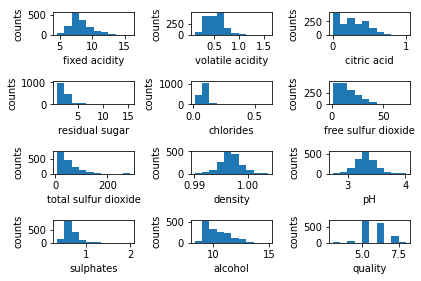

In [200]:
get_column_histograms(df_redwine)

Histograms of **white wine** features

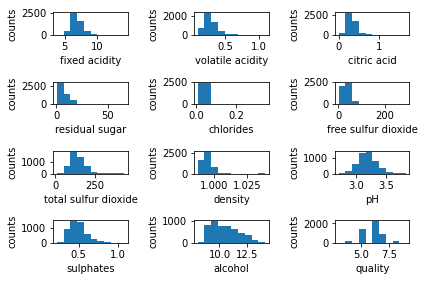

In [201]:
get_column_histograms(df_whitewine)

Observations:
1. Many features have a skewed distribution
2. Chlorides have less variance- values are very close to a central value
3. All other features have significant variance

Plot scatter matrix to observe correlation, make diagonal entries probability densitie functions

Scatter matrix for **red wine**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86bb1d4e80>,
      dtype=object)

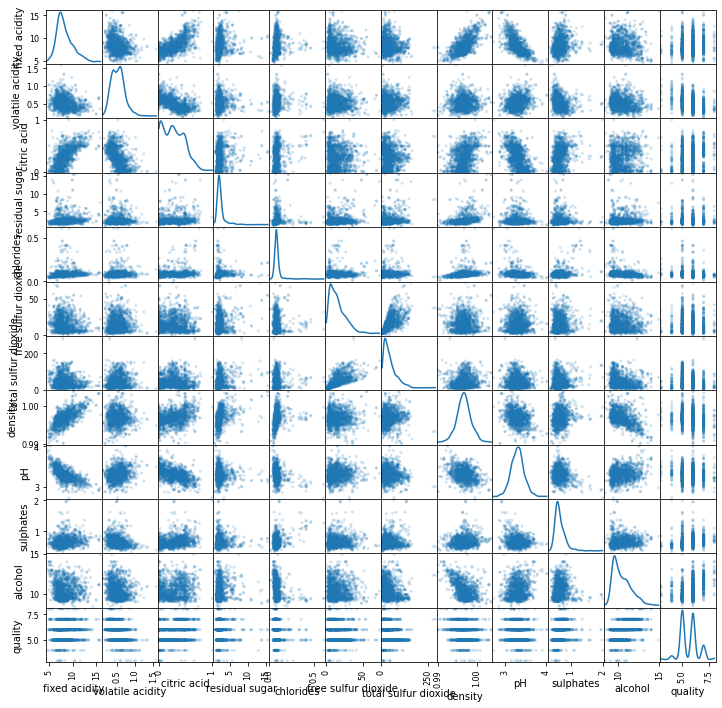

In [202]:
n_features = len(df_redwine.columns.values)
pd.plotting.scatter_matrix(df_redwine, alpha = 0.2, figsize=(n_features, n_features), diagonal = 'kde')


For **white wine**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86bb624710>,
      dtype=object)

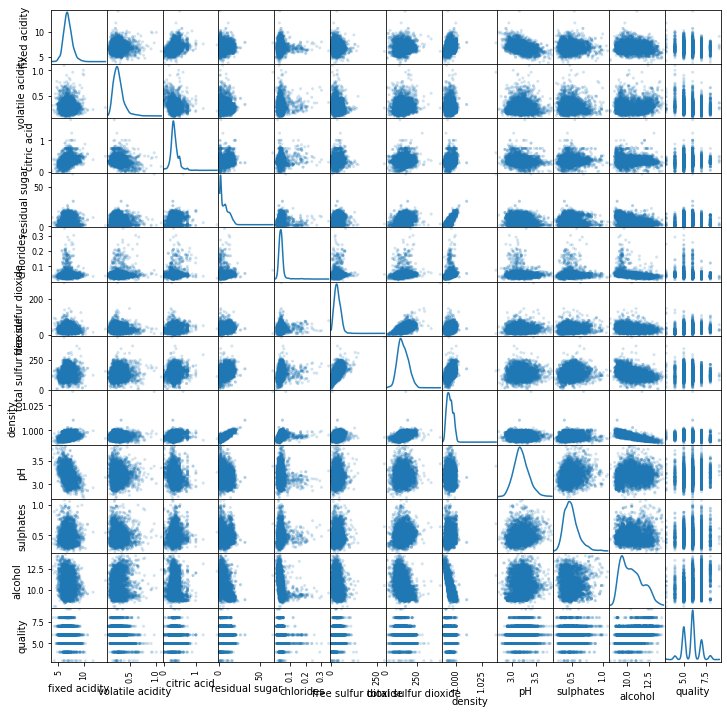

In [203]:
pd.plotting.scatter_matrix(df_whitewine, alpha = 0.2, figsize=(n_features, n_features), diagonal = 'kde')

Scatter plots don't show much correlation among the variables. Some of them do show relatively thin curves, for eg: fixed acidity vs density

Multiple horizontal or vertical lines indicate quantized values

Plot Correlation matrix

**Red wine**

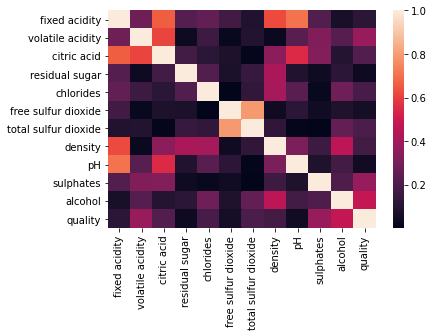

In [204]:
red_corrmat = df_redwine.corr(method='spearman')
sns.heatmap(abs(red_corrmat), annot=False)
plt.show()

**White wine**

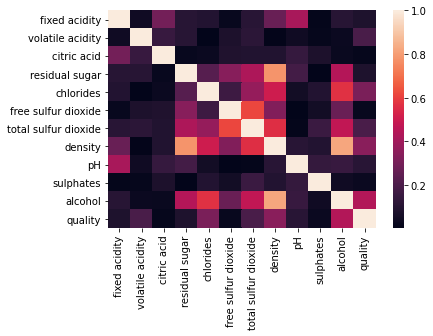

In [205]:
white_corrmat = df_whitewine.corr(method='spearman')
sns.heatmap(abs(white_corrmat), annot=False)
plt.show()

Correlation is not too high between columns. Hence, **all columns are used** for training the model

Split data into train and test sets

(k-fold cross validation will be over the train set)

In [206]:
from sklearn.model_selection import train_test_split

cols_of_features = df_redwine.columns.values  # features, applies to white wine dataset also
# print(cols_of_features)
cols_of_features = cols_of_features[cols_of_features != 'quality']
# print(cols_of_features)

X_red = df_redwine[cols_of_features]  # input vector
y_red = df_redwine['quality'] # target output

X_white = df_whitewine[cols_of_features] # output vector
y_white = df_whitewine['quality']

# perform train-test split now

print(X_red.shape)
print(y_red.shape)

print(X_white.shape)
print(y_white.shape)

X_red_train,  X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size = 0.25, random_state=0)

print(f"{X_red_train.shape}, {y_red_train.shape}, {X_red_test.shape}, {y_red_test.shape}")

X_white_train,  X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size = 0.25, random_state=0)

print(f"{X_white_train.shape}, {y_white_train.shape}, {X_white_test.shape}, {y_white_test.shape}")


(1599, 11)
(1599,)
(4898, 11)
(4898,)
(1199, 11), (1199,), (400, 11), (400,)
(3673, 11), (3673,), (1225, 11), (1225,)


# Normalize all columns

In [207]:
from sklearn.preprocessing import StandardScaler

# on red wine dataset
scaler_red = StandardScaler() # makes mean=0, std=1

scaler_red.fit(X_red_train)
Xr_train_norm = pd.DataFrame(scaler_red.transform(X_red_train))

display(Xr_train_norm)


# on white wine dataset
scaler_white = StandardScaler() # makes mean=0, std=1

scaler_white.fit(X_white_train)
Xw_train_norm = pd.DataFrame(scaler_white.transform(X_white_train))

display(Xw_train_norm)


Xr_test_norm = pd.DataFrame(scaler_red.transform(X_red_test)) # use same scaler that was used on train data
Xw_test_norm = pd.DataFrame(scaler_white.transform(X_white_test))
display(Xr_test_norm)
display(Xw_test_norm)

print(Xr_train_norm.mean())
print(Xr_test_norm.mean())
print(Xw_train_norm.mean())
print(Xw_test_norm.mean())

,0,1,2,3,4,5,6,7,8,9,10
0,0.035701,1.170139,-0.827972,-0.445352,0.057636,-0.012496,0.459864,-0.136917,-0.770684,0.911952,-0.756601
1,-0.425194,-0.547349,0.097514,-0.309962,-0.254119,0.270206,0.548141,0.224783,0.590788,-0.106087,-0.850481
2,0.035701,0.161456,-1.187883,-0.377657,-0.108633,-0.577901,-0.746586,0.448185,-0.576188,-1.237242,-0.756601
3,-0.886090,1.388233,-1.393547,-0.106878,0.348608,-0.200965,-0.511181,-0.083726,1.368771,-0.615107,0.276081
4,-0.598030,-0.438302,0.457426,2.262442,-0.274903,-0.389433,1.166079,0.554568,0.136964,0.968510,0.088321
...,...,...,...,...,...,...,...,...,...,...,...
1194,0.554209,0.679428,-0.056733,-0.377657,0.182338,-1.049072,-0.364053,0.331165,-0.381692,-1.350358,-0.756601
1195,-0.425194,0.733952,-0.879388,-0.716131,-0.441172,1.024079,0.224459,-0.110322,0.525956,-0.841338,-1.038241
1196,-0.252359,0.215979,0.200346,-0.377657,-0.170984,-0.577901,0.930674,0.006699,-0.122364,0.176702,-0.850481
1197,2.685851,-0.329255,1.125832,1.179324,-0.046282,-0.954838,-0.010946,2.841787,-0.057532,0.120144,2.153685


,0,1,2,3,4,5,6,7,8,9,10
0,-0.071849,0.512194,-0.444785,-1.028614,-0.627065,0.159256,-0.178470,-1.736844,0.012576,-0.691169,2.014966
1,2.108661,-0.781883,0.729931,-0.968564,-0.220090,-0.018046,-0.320698,-0.509783,-0.518376,-0.002834,0.714472
2,-1.525522,-0.085072,0.310390,-1.088664,-0.943602,-1.436456,-2.122257,-1.890227,0.676267,-1.379504,2.096247
3,-0.556407,-0.980972,1.233381,2.334181,0.367764,1.223063,1.054176,2.176118,-1.381173,1.029668,-1.642674
4,-0.556407,-0.980972,-0.193060,-0.948548,0.141666,0.041055,-0.273288,-0.203018,2.733706,1.545918,-0.098337
...,...,...,...,...,...,...,...,...,...,...,...
3668,-1.040965,1.507638,0.058665,0.252450,-0.039212,-0.609050,-0.486631,-0.605221,-1.049328,-1.035336,0.389348
3669,-1.162104,-0.383705,-1.787317,-0.988581,-0.491407,1.459465,2.571278,-0.141665,1.008112,-0.433044,-0.748585
3670,1.260685,0.512194,-0.444785,5.056443,0.322545,-0.018046,0.888243,5.557354,-0.252900,-0.949295,-1.398832
3671,2.472079,-0.184617,-0.025243,0.352534,-0.988822,0.691160,1.504566,0.540036,-0.385638,-0.260960,0.226786


,0,1,2,3,4,5,6,7,8,9,10
0,1.418388,-0.329255,0.817337,-0.309962,1.741114,1.024079,0.548141,0.767332,-0.900348,0.572606,0.369962
1,-0.137135,1.579065,-1.393547,1.043935,0.161555,-1.049072,-0.981991,0.948182,0.331460,-0.728222,-0.756601
2,0.438985,-1.310677,0.303178,-0.343810,-0.503523,-0.295199,-0.599458,-0.849679,-0.316860,1.025068,1.214883
3,1.072716,0.624905,0.457426,-0.513047,-0.711360,-1.049072,-0.981991,0.767332,-0.900348,-1.350358,-0.381080
4,2.224955,-0.438302,1.125832,-0.783826,-0.254119,-1.237540,-1.217396,0.075847,-1.159676,-0.162645,-0.005559
...,...,...,...,...,...,...,...,...,...,...,...
395,0.554209,-0.765442,0.663089,0.028512,-0.295686,-0.577901,-0.628884,0.873715,0.201796,0.516048,-0.193320
396,2.052119,0.270503,1.999902,-0.039183,-0.316470,-0.954838,-0.305202,1.299244,-1.678332,-0.558549,-0.381080
397,-0.598030,-0.901751,1.125832,-0.039183,0.016069,2.154889,1.725166,-0.083726,0.331460,0.685721,0.557722
398,4.183761,0.842999,2.514061,0.773155,0.265473,-0.954838,-0.128648,3.426890,-2.326652,0.120144,0.745482


,0,1,2,3,4,5,6,7,8,9,10
0,0.533848,0.412650,0.142573,-0.988581,0.186886,-1.613757,0.580082,-0.530234,0.344421,-0.605127,0.145505
1,0.170430,0.313105,-0.612601,0.212417,1.046057,-0.431748,0.508967,0.478683,-0.385638,-0.260960,-0.586023
2,0.897266,-1.379149,3.414996,-0.948548,-0.265309,-0.490849,-0.842202,-0.816548,-0.783852,-0.777211,0.226786
3,-2.252359,0.114017,1.736831,-0.127866,-0.491407,1.104863,0.390444,-1.443713,0.543529,-1.293462,1.933685
4,-1.040965,0.014472,-0.948234,1.163207,0.096447,0.395657,0.580082,0.580938,0.078945,-0.260960,-0.342180
...,...,...,...,...,...,...,...,...,...,...,...
1220,-0.435268,1.109461,-0.864326,-0.187915,0.232106,-0.609050,0.248215,-0.203018,0.344421,-1.207420,-0.423461
1221,-0.556407,-0.483250,0.142573,-0.348049,-0.310529,0.454758,0.200806,-0.625672,-0.053793,-0.777211,0.389348
1222,-1.162104,-0.781883,-0.444785,-1.068647,-0.129651,0.572959,-0.913316,-1.249428,1.406326,-0.691169,0.714472
1223,-1.040965,-1.379149,-1.367776,-0.147882,-0.446187,0.100155,-0.273288,-0.090537,-0.916590,0.685500,-0.586023


0     2.917692e-16
1    -5.644637e-16
2    -1.402363e-16
3     1.329906e-16
4    -1.719040e-16
5    -9.704034e-17
6     2.888987e-17
7    -8.163889e-15
8    -6.265028e-16
9    -5.142768e-16
10   -9.568845e-16
dtype: float64
0    -0.042363
1    -0.055956
2    -0.001204
3    -0.051622
4     0.019914
5    -0.097072
6    -0.106358
7    -0.022809
8     0.058031
9    -0.013757
10    0.064029
dtype: float64
0    -2.483417e-16
1     2.176315e-17
2     9.610736e-17
3    -1.559390e-16
4    -3.376614e-16
5     2.883618e-17
6     2.022915e-17
7    -1.148261e-14
8     9.245410e-16
9    -2.243569e-17
10   -3.964370e-16
dtype: float64
0    -0.021910
1    -0.012141
2     0.039691
3     0.042112
4    -0.017137
5     0.000650
6    -0.015942
7     0.043278
8     0.004287
9    -0.016601
10   -0.021832
dtype: float64


Observations: After scaling, the mean of training data is zero. Mean of test data is small, but not zero

# PART C: Training and Validation and Testing

LASSO

**Red wine**

In [208]:
def get_grid_search_results(estimator, hyper_parameters, scoring, train_X, train_y):
  clf = GridSearchCV(estimator = estimator, param_grid = hyper_parameters, scoring=scoring, cv=5)  # perform 5 fold cross validation over alpha=0.1, 0.5
  clf.fit(train_X, train_y)
  print(f"Best parameters: \n {clf.best_params_}")
  print(f"CV results: \n {clf.cv_results_}")

In [209]:
def get_trained_model(estimator, train_X, train_y, test_X, test_y, metric_for_test):
  estimator.fit(train_X, train_y)
  y_predict = estimator.predict(test_X)
  performance = metric_for_test(test_y, y_predict)
  return estimator, performance

In [230]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

hyperparameters = {'alpha':[0.1, 0.3, 1, 10, 100]}
get_grid_search_results(Lasso(), hyperparameters, 'neg_mean_squared_error', Xr_train_norm, y_red_train)

# train on alpha = 0.1
red_lasso_model1, mse_red_lasso_model1 = get_trained_model(Lasso(alpha=0.1), Xr_train_norm, y_red_train, Xr_test_norm, y_red_test, mean_squared_error)
print(f"Test set MSE with alpha=0.1 is {mse_red_lasso_model1}")

# now train on alpha=0.3
red_lasso_model2, mse_red_lasso_model2 = get_trained_model(Lasso(alpha=0.3), Xr_train_norm, y_red_train, Xr_test_norm, y_red_test,mean_squared_error)
print(f"Test set MSE with alpha = 0.3 is {mse_red_lasso_model2}")



Best parameters: 
 {'alpha': 0.1}
CV results: 
 {'mean_fit_time': array([0.00298038, 0.00271516, 0.00276904, 0.00272188, 0.0024435 ]), 'std_fit_time': array([2.77701732e-04, 4.30627517e-05, 9.84503499e-05, 1.53555233e-04,
       4.48790662e-05]), 'mean_score_time': array([0.00157609, 0.00178208, 0.00151205, 0.00145688, 0.00135841]), 'std_score_time': array([8.23875538e-05, 5.75026302e-04, 1.53546007e-05, 2.00320420e-05,
       2.15805562e-05]), 'param_alpha': masked_array(data=[0.1, 0.3, 1, 10, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.1}, {'alpha': 0.3}, {'alpha': 1}, {'alpha': 10}, {'alpha': 100}], 'split0_test_score': array([-0.44715296, -0.52410984, -0.58408258, -0.58408258, -0.58408258]), 'split1_test_score': array([-0.50589631, -0.67261853, -0.73430457, -0.73430457, -0.73430457]), 'split2_test_score': array([-0.46525682, -0.59355756, -0.65807734, -0.65807734, -0.65807734]), 'split3_test_sc

In [211]:
print(f"For alpha=0.1, \n {red_lasso_model1.coef_} \n {red_lasso_model1.intercept_}")
print(f"For alpha=0.3, \n {red_lasso_model2.coef_} \n {red_lasso_model2.intercept_}")

For alpha=0.1, 
 [ 0.         -0.18249004  0.          0.         -0.         -0.
 -0.         -0.         -0.          0.03328817  0.24032302] 
 5.6422018348623855
For alpha=0.3, 
 [ 0.         -0.02208584  0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          0.07317718] 
 5.6422018348623855


1. For alpha=0.1, only three features are used in the model- all others are eliminated. 
2. For alpha=0.3, only two features are used, all others are eliminated
This is a demonstration of feature elimination

**White Wine**

In [231]:
hyperparameters = {'alpha':[0.1, 0.3, 1, 10, 50, 100]}

get_grid_search_results(Lasso(), hyperparameters, 'neg_mean_squared_error', Xw_train_norm, y_white_train)

white_lasso_model1, mse_white_lasso_model1 = get_trained_model(Lasso(alpha=0.1), Xw_train_norm, y_white_train, Xw_test_norm, y_white_test, mean_squared_error)
print(f"Test set MSE with alpha = 0.1 is {mse_white_lasso_model1}")

# now train the model with alpha=1
white_lasso_model2, mse_white_lasso_model2 = get_trained_model(Lasso(alpha=1), Xw_train_norm, y_white_train, Xw_test_norm, y_white_test, mean_squared_error)
print(f"Test set MSE with alpha = 1 is {mse_white_lasso_model2}")


Best parameters: 
 {'alpha': 0.1}
CV results: 
 {'mean_fit_time': array([0.0043448 , 0.00389895, 0.00346546, 0.00325193, 0.00336146,
       0.0035542 ]), 'std_fit_time': array([6.01976358e-04, 2.90970730e-04, 2.62159475e-04, 4.68781130e-05,
       1.82595636e-04, 3.24214436e-04]), 'mean_score_time': array([0.00202169, 0.00172629, 0.00170174, 0.00191555, 0.00162158,
       0.00176792]), 'std_score_time': array([4.72388896e-04, 9.94934871e-05, 1.92153814e-04, 6.94435073e-04,
       1.59679415e-04, 3.17988733e-04]), 'param_alpha': masked_array(data=[0.1, 0.3, 1, 10, 50, 100],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.1}, {'alpha': 0.3}, {'alpha': 1}, {'alpha': 10}, {'alpha': 50}, {'alpha': 100}], 'split0_test_score': array([-0.60697987, -0.7216135 , -0.7807723 , -0.7807723 , -0.7807723 ,
       -0.7807723 ]), 'split1_test_score': array([-0.5565808 , -0.6577965 , -0.71647581, -0.71647581, -0.716475

In [232]:
print(f"For alpha=0.1, \n {white_lasso_model1.coef_} \n {white_lasso_model1.intercept_}")
print(f"For alpha=1, \n {white_lasso_model2.coef_} \n {white_lasso_model2.intercept_}")

For alpha=0.1, 
 [-0.         -0.09224171 -0.          0.         -0.          0.
 -0.         -0.          0.          0.          0.29119242] 
 5.895725564933297
For alpha=1, 
 [-0. -0. -0. -0. -0.  0. -0. -0.  0.  0.  0.] 
 5.895725564933297


1. For alpha=0.1, two features are used in the model (have nonzero weights)
2. For alpha=0.3, only one feature is used in the model
This is feature elimination due to LASSO (L1 regularization leads to feature elimination).
3. For alpha=1, all weights are zero, and the model predicts a constant output

RIDGE

**Red wine**

In [238]:
from sklearn.linear_model import Ridge

hyperparameters_ridge = {'alpha':[0.01, 0.1,1, 10, 50, 100, 200, 1000, 5000]}
get_grid_search_results(Ridge(), hyperparameters_ridge, 'neg_mean_squared_error', Xr_train_norm, y_red_train)

red_ridge_model1, mse_red_ridge_model1 = get_trained_model(Ridge(alpha=100), Xr_train_norm, y_red_train, Xr_test_norm, y_red_test, mean_squared_error) # model 1 has the best parameter (from cv)
print(f"Test set MSE of Ridge regression with alpha=100 is {mse_red_ridge_model1}")

red_ridge_model2, mse_red_ridge_model2 = get_trained_model(Ridge(alpha=0.1), Xr_train_norm, y_red_train, Xr_test_norm, y_red_test, mean_squared_error)
print(f"Test set MSE of Ridge regression with alpha=0.1 is {mse_red_ridge_model2}")

Best parameters: 
 {'alpha': 100}
CV results: 
 {'mean_fit_time': array([0.00383806, 0.00323858, 0.00295653, 0.00351748, 0.00284472,
       0.00370617, 0.00401587, 0.00293155, 0.00273266]), 'std_fit_time': array([1.85462351e-03, 5.44264314e-04, 1.94681733e-04, 3.57195612e-04,
       9.37596454e-05, 9.32956210e-04, 1.16843200e-03, 1.44164868e-04,
       1.13148102e-04]), 'mean_score_time': array([0.00162492, 0.00147371, 0.00146842, 0.00179787, 0.00148792,
       0.00160785, 0.00151892, 0.00158815, 0.0014945 ]), 'std_score_time': array([3.32073642e-04, 6.31274411e-05, 8.03655241e-05, 2.86597911e-04,
       9.98218929e-05, 1.24644668e-04, 1.00097127e-04, 2.83260594e-04,
       1.46435410e-04]), 'param_alpha': masked_array(data=[0.01, 0.1, 1, 10, 50, 100, 200, 1000, 5000],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}, {'alpha': 

In [239]:
red_ridge_model1.coef_

array([ 0.0475138 , -0.20020971, -0.0013821 ,  0.03571524, -0.08425538,
        0.0197794 , -0.09075534, -0.05902593, -0.04003414,  0.14282596,
        0.25243939])

In [240]:
red_ridge_model2.coef_

array([ 0.03937739, -0.22175744, -0.03031664,  0.03322133, -0.08845738,
        0.02812639, -0.09838343, -0.03727972, -0.05917114,  0.1512957 ,
        0.28426871])

**White wine**

In [242]:
hyperparameters_ridge = {'alpha':[0.1, 1, 10, 100, 1e3, 1e4]}
get_grid_search_results(Ridge(), hyperparameters_ridge, 'neg_mean_squared_error', Xw_train_norm, y_white_train)

white_ridge_model1, mse_white_ridge_model1 = get_trained_model(Ridge(alpha=1), Xw_train_norm, y_white_train, Xw_test_norm, y_white_test, mean_squared_error)
print(f"Test set MSE of Ridge regression with alpha=1 is {mse_white_ridge_model1}")

# train on alpha=1e3
white_ridge_model2, mse_white_ridge_model2 = get_trained_model(Ridge(alpha=1e3), Xw_train_norm, y_white_train, Xw_test_norm, y_white_test, mean_squared_error)
print(f"Test set MSE of Ridge regression with alpha=1000 is {mse_white_ridge_model2}")

Best parameters: 
 {'alpha': 1}
CV results: 
 {'mean_fit_time': array([0.00496025, 0.00311751, 0.00287166, 0.00297217, 0.00317054,
       0.0032207 ]), 'std_fit_time': array([3.96659780e-03, 2.80768076e-04, 2.81776468e-05, 1.40181480e-04,
       3.06327754e-04, 3.13206871e-04]), 'mean_score_time': array([0.00147963, 0.00141435, 0.00138116, 0.00150299, 0.00171404,
       0.00155926]), 'std_score_time': array([2.58290809e-04, 4.87831214e-05, 2.86959318e-05, 2.61918973e-04,
       3.92506426e-04, 1.76839482e-04]), 'param_alpha': masked_array(data=[0.1, 1, 10, 100, 1000.0, 10000.0],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.1}, {'alpha': 1}, {'alpha': 10}, {'alpha': 100}, {'alpha': 1000.0}, {'alpha': 10000.0}], 'split0_test_score': array([-0.56206929, -0.56223756, -0.56375912, -0.57099121, -0.59569837,
       -0.68643897]), 'split1_test_score': array([-0.49681533, -0.49658235, -0.49510911, -0.49573

There is a very small difference in mean squared error between the two models

Random Forest

**Red wine**

In [244]:
from sklearn.ensemble import RandomForestRegressor
hyperparameters_random_forest = {'max_depth':[2, 5, 10, 50, 100]}
get_grid_search_results(RandomForestRegressor(),hyperparameters_random_forest,'neg_mean_squared_error',Xr_train_norm, y_red_train )

red_ranfor_model1, mse_red_ranfor_model1 = get_trained_model(RandomForestRegressor(max_depth=50), Xr_train_norm, y_red_train, Xr_test_norm, y_red_test, mean_squared_error)
print(f"Test set MSE of Random Forest regression with max depth=50 is {mse_red_ranfor_model1}")
red_ranfor_model2, mse_red_ranfor_model2 = get_trained_model(RandomForestRegressor(max_depth=5), Xr_train_norm, y_red_train, Xr_test_norm, y_red_test, mean_squared_error)
print(f"Test set MSE of Random Forest regression with max depth=5 is {mse_red_ranfor_model2}")

Best parameters: 
 {'max_depth': 100}
CV results: 
 {'mean_fit_time': array([0.20824628, 0.32524261, 0.49223003, 0.54905462, 0.54830651]), 'std_fit_time': array([0.01078674, 0.00511429, 0.00132858, 0.00660294, 0.00662214]), 'mean_score_time': array([0.00772591, 0.00779715, 0.00940328, 0.00970511, 0.00975685]), 'std_score_time': array([6.84319361e-04, 4.79601003e-05, 2.59823330e-04, 1.86673033e-04,
       9.36106034e-05]), 'param_max_depth': masked_array(data=[2, 5, 10, 50, 100],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 2}, {'max_depth': 5}, {'max_depth': 10}, {'max_depth': 50}, {'max_depth': 100}], 'split0_test_score': array([-0.43053834, -0.40079125, -0.39204217, -0.4019375 , -0.3970975 ]), 'split1_test_score': array([-0.49279373, -0.42244828, -0.38829775, -0.37842708, -0.37406708]), 'split2_test_score': array([-0.47825321, -0.41080997, -0.38079846, -0.34975458, -0.3619825 ]), 'split3_test_score':

**White Wine**

In [247]:
hyperparameters_random_forest = {'max_depth':[2, 5, 10, 50, 100, 150]}
get_grid_search_results(RandomForestRegressor(),hyperparameters_random_forest,'neg_mean_squared_error',Xw_train_norm, y_white_train )

white_ranfor_model1, mse_white_ranfor_model1 = get_trained_model(RandomForestRegressor(max_depth=50), Xw_train_norm, y_white_train, Xw_test_norm, y_white_test, mean_squared_error)
print(f"Test set MSE of Random Forest regression with max depth=50 is {mse_white_ranfor_model1}")
white_ranfor_model2, mse_white_ranfor_model2 = get_trained_model(RandomForestRegressor(max_depth=2), Xw_train_norm, y_white_train, Xw_test_norm, y_white_test, mean_squared_error)
print(f"Test set MSE of Random Forest regression with max depth=2 is {mse_white_ranfor_model2}")

Best parameters: 
 {'max_depth': 50}
CV results: 
 {'mean_fit_time': array([0.36656914, 0.73536692, 1.3117672 , 1.70423636, 1.70348196,
       1.70858693]), 'std_fit_time': array([0.00433293, 0.00723467, 0.00871961, 0.02049513, 0.02598358,
       0.02186036]), 'mean_score_time': array([0.00839276, 0.01042542, 0.01459022, 0.01895924, 0.01925187,
       0.02030458]), 'std_score_time': array([0.00010509, 0.00026943, 0.00031798, 0.00038564, 0.00057635,
       0.00206758]), 'param_max_depth': masked_array(data=[2, 5, 10, 50, 100, 150],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 2}, {'max_depth': 5}, {'max_depth': 10}, {'max_depth': 50}, {'max_depth': 100}, {'max_depth': 150}], 'split0_test_score': array([-0.556749  , -0.49800515, -0.40392649, -0.35456231, -0.35460639,
       -0.35525986]), 'split1_test_score': array([-0.51538613, -0.46467727, -0.40478956, -0.37287946, -0.37895878,
       -0.3776027

As expected, the Random Forest with max depth = 50, which was the best from cross validation, performs better than max depth = 2 on the test set

Support Vector Regression

**Red Wine**

In [249]:
from sklearn.svm import SVR

hyperparameters_svr = {'kernel':['rbf', 'poly'], 'C':[0.1, 1, 10, 100]}

get_grid_search_results(SVR(), hyperparameters_svr, 'neg_mean_squared_error', Xr_train_norm, y_red_train)

red_svr_model1, mse_red_svr_model1 = get_trained_model(SVR(kernel='rbf', C=1), Xr_train_norm, y_red_train, Xr_test_norm, y_red_test, mean_squared_error)
print(f"Test set MSE of Support Vector regression with kernel 'rbf', C=1 is {mse_red_svr_model1}")

red_svr_model2, mse_red_svr_model2 = get_trained_model(SVR(kernel='poly', C=1), Xr_train_norm, y_red_train, Xr_test_norm, y_red_test, mean_squared_error)
print(f"Test set MSE of Support Vector regression with kernel 'poly', C=1 is {mse_red_svr_model2}")



Best parameters: 
 {'C': 1, 'kernel': 'rbf'}
CV results: 
 {'mean_fit_time': array([ 0.06729789,  0.07195067,  0.08547211,  0.14628677,  0.18506851,
        1.10381713,  0.96492696, 15.34723506]), 'std_fit_time': array([2.60172388e-03, 2.16801610e-03, 1.82645642e-03, 8.98636742e-03,
       3.44920658e-03, 1.24851510e-01, 4.70939196e-02, 3.37600628e+00]), 'mean_score_time': array([0.00908422, 0.00489793, 0.0081594 , 0.00466161, 0.00821991,
       0.00473962, 0.00860043, 0.00505304]), 'std_score_time': array([1.04103641e-03, 2.56016157e-04, 7.30545635e-04, 3.57463799e-05,
       1.17635969e-04, 8.17374000e-05, 2.03529070e-04, 3.47998653e-04]), 'param_C': masked_array(data=[0.1, 0.1, 1, 1, 10, 10, 100, 100],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'poly', 'rbf', 'poly', 'rbf', 'poly', 'rbf',
                   'poly'],
             mask=[False, False, False, Fals

**White Wine**

In [251]:
hyperparameters_svr = {'kernel':['rbf', 'poly'], 'C':[0.1, 1,10]}

get_grid_search_results(SVR(), hyperparameters_svr, 'neg_mean_squared_error', Xw_train_norm, y_white_train)

white_svr_model1, mse_white_svr_model1 = get_trained_model(SVR(kernel='rbf', C=1), Xw_train_norm, y_white_train, Xw_test_norm, y_white_test, mean_squared_error)
print(f"Test set MSE of Support Vector regression with kernel 'rbf', C=1 is {mse_white_svr_model1}")

white_svr_model2, mse_white_svr_model2 = get_trained_model(SVR(kernel='poly', C=0.01), Xw_train_norm, y_white_train, Xw_test_norm, y_white_test, mean_squared_error)
print(f"Test set MSE of Support Vector regression with kernel 'poly', C=0.01 is {mse_white_svr_model2}")


Best parameters: 
 {'C': 1, 'kernel': 'rbf'}
CV results: 
 {'mean_fit_time': array([ 0.54531674,  0.53490806,  0.6830441 ,  1.69781909,  1.84198537,
       16.1147141 ]), 'std_fit_time': array([0.00340776, 0.0198005 , 0.00598047, 0.10153376, 0.05532971,
       0.84910483]), 'mean_score_time': array([0.06702461, 0.02964301, 0.06742306, 0.03085194, 0.06851716,
       0.0318192 ]), 'std_score_time': array([0.00098478, 0.00057708, 0.00302234, 0.00048583, 0.00359745,
       0.00274597]), 'param_C': masked_array(data=[0.1, 0.1, 1, 1, 10, 10],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'poly', 'rbf', 'poly', 'rbf', 'poly'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.1, 'kernel': 'rbf'}, {'C': 0.1, 'kernel': 'poly'}, {'C': 1, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'poly'}, {'C': 10, 'kernel': 'rbf'},

# PART D: Importance of Each Variable

LASSO- the weights indicate feature importance

In [252]:
def plot_importance_lasso_ridge(model, features, title):
  importance = abs(model.coef_)
  labels_plot = features.copy()
  print(f"For model : {title}")
  for i in range(len(features)):
    print(f"Feature {features[i]} has importance {importance[i]}")
    if importance[i]==0:
      labels_plot[i]=''
  plt.bar(labels_plot, importance)
  plt.title(title)
  plt.show()

For model : Red Wine LASSO model 1
Feature fixed acidity has importance 0.0
Feature volatile acidity has importance 0.18249004420120418
Feature citric acid has importance 0.0
Feature residual sugar has importance 0.0
Feature chlorides has importance 0.0
Feature free sulfur dioxide has importance 0.0
Feature total sulfur dioxide has importance 0.0
Feature density has importance 0.0
Feature pH has importance 0.0
Feature sulphates has importance 0.03328816513385312
Feature alcohol has importance 0.24032301527425212


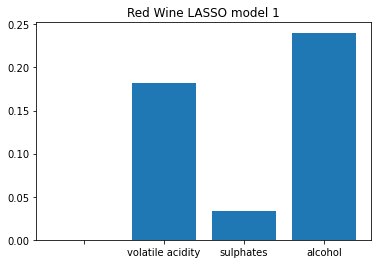

For model : Red Wine LASSO model 2
Feature fixed acidity has importance 0.0
Feature volatile acidity has importance 0.02208584294617997
Feature citric acid has importance 0.0
Feature residual sugar has importance 0.0
Feature chlorides has importance 0.0
Feature free sulfur dioxide has importance 0.0
Feature total sulfur dioxide has importance 0.0
Feature density has importance 0.0
Feature pH has importance 0.0
Feature sulphates has importance 0.0
Feature alcohol has importance 0.07317718049766324


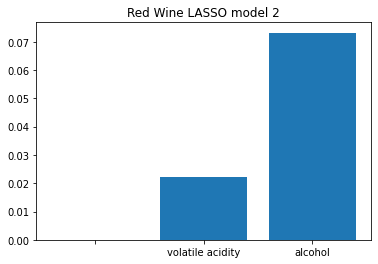

For model : White Wine LASSO model 1
Feature fixed acidity has importance 0.0
Feature volatile acidity has importance 0.09224171216295762
Feature citric acid has importance 0.0
Feature residual sugar has importance 0.0
Feature chlorides has importance 0.0
Feature free sulfur dioxide has importance 0.0
Feature total sulfur dioxide has importance 0.0
Feature density has importance 0.0
Feature pH has importance 0.0
Feature sulphates has importance 0.0
Feature alcohol has importance 0.29119241831381404


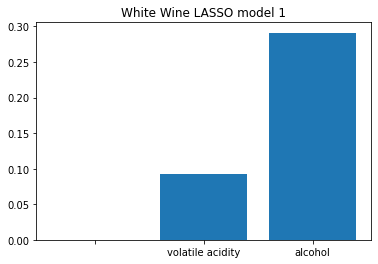

For model : White Wine LASSO model 2
Feature fixed acidity has importance 0.0
Feature volatile acidity has importance 0.0
Feature citric acid has importance 0.0
Feature residual sugar has importance 0.0
Feature chlorides has importance 0.0
Feature free sulfur dioxide has importance 0.0
Feature total sulfur dioxide has importance 0.0
Feature density has importance 0.0
Feature pH has importance 0.0
Feature sulphates has importance 0.0
Feature alcohol has importance 0.0


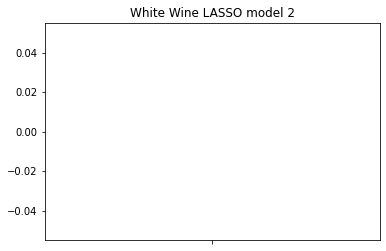

In [253]:
features=df_redwine.columns.values
features = features[features != 'quality']

plot_importance_lasso_ridge(red_lasso_model1, features, 'Red Wine LASSO model 1')

plot_importance_lasso_ridge(red_lasso_model2, features, 'Red Wine LASSO model 2')

plot_importance_lasso_ridge(white_lasso_model1, features, 'White Wine LASSO model 1')

plot_importance_lasso_ridge(white_lasso_model2, features, 'White Wine LASSO model 2')


RIDGE- weights indicate feature importance

For model : Red Wine Ridge model 1
Feature fixed acidity has importance 0.047513795701881655
Feature volatile acidity has importance 0.20020971486136
Feature citric acid has importance 0.0013821018540950234
Feature residual sugar has importance 0.03571524008870986
Feature chlorides has importance 0.08425537688727111
Feature free sulfur dioxide has importance 0.019779404401948118
Feature total sulfur dioxide has importance 0.09075534410714269
Feature density has importance 0.059025930299617634
Feature pH has importance 0.04003414312347421
Feature sulphates has importance 0.14282596395749228
Feature alcohol has importance 0.25243938594089615


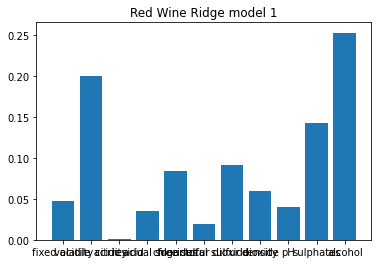

For model : Red Wine Ridge model 2
Feature fixed acidity has importance 0.039377392499361674
Feature volatile acidity has importance 0.22175744316305007
Feature citric acid has importance 0.030316641401258806
Feature residual sugar has importance 0.03322132906170985
Feature chlorides has importance 0.08845737611407009
Feature free sulfur dioxide has importance 0.028126388162712335
Feature total sulfur dioxide has importance 0.09838343093617044
Feature density has importance 0.03727972137056533
Feature pH has importance 0.059171135646872895
Feature sulphates has importance 0.1512957008344458
Feature alcohol has importance 0.28426870575510155


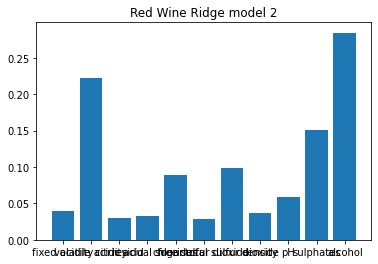

For model : White Wine Ridge model 1
Feature fixed acidity has importance 0.09359763443564738
Feature volatile acidity has importance 0.18245813118807597
Feature citric acid has importance 0.002033967125989002
Feature residual sugar has importance 0.47620487683916346
Feature chlorides has importance 0.011685145550450454
Feature free sulfur dioxide has importance 0.08059089096283036
Feature total sulfur dioxide has importance 0.00973724563634204
Feature density has importance 0.5724396191001314
Feature pH has importance 0.13087608973196863
Feature sulphates has importance 0.07236965083310852
Feature alcohol has importance 0.16637073798076069


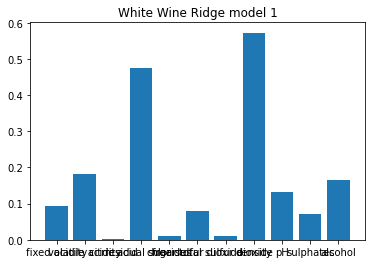

For model : White Wine Ridge model 2
Feature fixed acidity has importance 0.0181408680092962
Feature volatile acidity has importance 0.13819840102368855
Feature citric acid has importance 0.004815411603585097
Feature residual sugar has importance 0.10701574594445154
Feature chlorides has importance 0.05354242534686928
Feature free sulfur dioxide has importance 0.07641488582790312
Feature total sulfur dioxide has importance 0.03649027614891955
Feature density has importance 0.1070354866555978
Feature pH has importance 0.03717408343470759
Feature sulphates has importance 0.03766949404341707
Feature alcohol has importance 0.26332217449366374


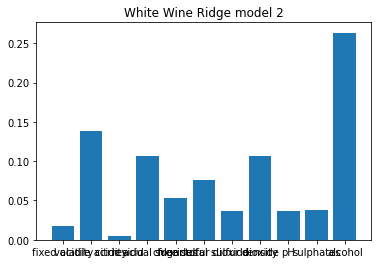

In [254]:
plot_importance_lasso_ridge(red_ridge_model1, features, 'Red Wine Ridge model 1')
plot_importance_lasso_ridge(red_ridge_model2, features, 'Red Wine Ridge model 2')

plot_importance_lasso_ridge(white_ridge_model1, features, 'White Wine Ridge model 1')
plot_importance_lasso_ridge(white_ridge_model2, features, 'White Wine Ridge model 2')


Random Forest- feature importances are obtainable directly from the trained model 

In [255]:
def plot_importance_random_forest(model, features, title):
  importance = model.feature_importances_
  labels_plot = features.copy()
  print(f"For model : {title}")
  for i in range(len(features)):
    print(f"Feature {features[i]} has importance {importance[i]}")
    if importance[i]==0:
      labels_plot[i]=''
  plt.bar(labels_plot, importance)
  plt.title(title)
  plt.show()

For model : Red Wine Random Forest model 1
Feature fixed acidity has importance 0.04444500335151148
Feature volatile acidity has importance 0.1598826290546523
Feature citric acid has importance 0.04803739575342423
Feature residual sugar has importance 0.05675521534113441
Feature chlorides has importance 0.06517799642587412
Feature free sulfur dioxide has importance 0.048804198244117726
Feature total sulfur dioxide has importance 0.07669919546086176
Feature density has importance 0.05061396415268853
Feature pH has importance 0.05652573326814623
Feature sulphates has importance 0.13888962827657061
Feature alcohol has importance 0.2541690406710187


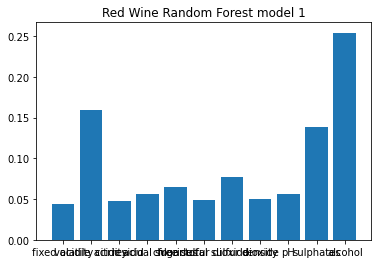

For model : Red Wine Random Forest model 2
Feature fixed acidity has importance 0.020929566915811316
Feature volatile acidity has importance 0.20036544395582268
Feature citric acid has importance 0.015831137624023186
Feature residual sugar has importance 0.02723316157309317
Feature chlorides has importance 0.03339063917906649
Feature free sulfur dioxide has importance 0.017977392134146356
Feature total sulfur dioxide has importance 0.06191382261048618
Feature density has importance 0.020967124069918772
Feature pH has importance 0.03058590349374223
Feature sulphates has importance 0.1757426271830197
Feature alcohol has importance 0.39506318126086987


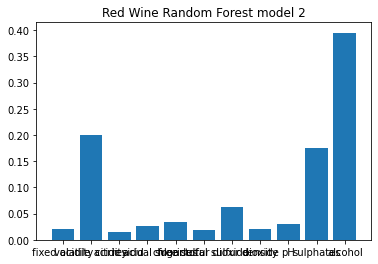

For model : White Wine Random Forest model 1
Feature fixed acidity has importance 0.057669349001522666
Feature volatile acidity has importance 0.12623447525150683
Feature citric acid has importance 0.05771793571361419
Feature residual sugar has importance 0.06672636855339885
Feature chlorides has importance 0.0664085958660235
Feature free sulfur dioxide has importance 0.11620716973488512
Feature total sulfur dioxide has importance 0.06725725231330791
Feature density has importance 0.05780429586569188
Feature pH has importance 0.07224561646810108
Feature sulphates has importance 0.06227757601696624
Feature alcohol has importance 0.2494513652149818


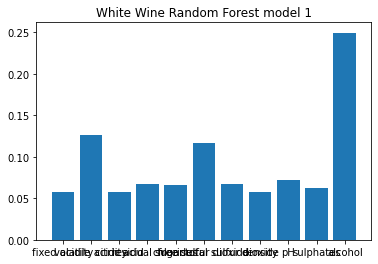

For model : White Wine Random Forest model 2
Feature fixed acidity has importance 0.0
Feature volatile acidity has importance 0.21883601783841874
Feature citric acid has importance 0.0
Feature residual sugar has importance 0.0
Feature chlorides has importance 0.0
Feature free sulfur dioxide has importance 0.10812223238808215
Feature total sulfur dioxide has importance 0.0
Feature density has importance 0.0
Feature pH has importance 0.0
Feature sulphates has importance 0.0
Feature alcohol has importance 0.6730417497734992


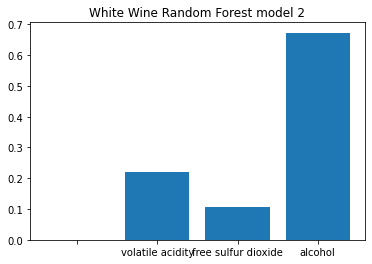

In [256]:
plot_importance_random_forest(red_ranfor_model1, features, 'Red Wine Random Forest model 1')
plot_importance_random_forest(red_ranfor_model2, features, 'Red Wine Random Forest model 2')

plot_importance_random_forest(white_ranfor_model1, features, 'White Wine Random Forest model 1')
plot_importance_random_forest(white_ranfor_model2, features, 'White Wine Random Forest model 2')

SVM- Feature importance is given by coefficients, but only for linear kernels. Since rbf and poly kernels were used, it may not be possible to obtain feature importance from the model. However, the correlation between the features and the prediction can be observed

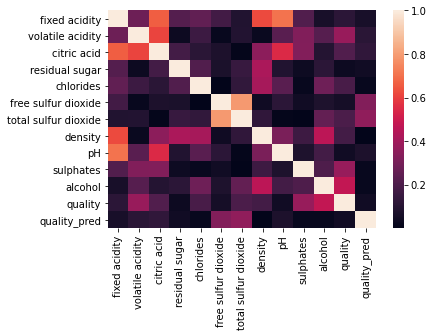

In [257]:
df_with_prediction = df_redwine.copy()
df_with_prediction['quality_pred'] = red_svr_model1.predict(X_red)
corr_feat_imp = df_with_prediction.corr(method='spearman')
sns.heatmap(abs(corr_feat_imp), annot=False)
plt.show()

Since the predictions have some correlation with free sulful dioxide, and total sulfur dioxide, these can be considered the important features

# PART E: Out-of Distribution Prediction

In [258]:
# test LASSO model 1 trained on red, on white dataset

y_odp_rw = red_lasso_model1.predict(Xw_test_norm)
mse_odp_rw = mean_squared_error(y_white_test, y_odp_rw)

print(f"MSE for train: red, test: red = {mse_red_lasso_model1}")
print(f"MSE for train: red, test: white = {mse_odp_rw}")
print(y_odp_rw)
print(np.array(y_white_test))

MSE for train: red, test: red = 0.43369515375973067
MSE for train: red, test: white = 0.7066541973982728
[5.58172203 5.43554156 5.92251286 ... 5.93358388 5.77586713 4.91667867]
[5 6 7 ... 6 6 4]


The predictions are quite awry, and the MSE is much higher than that of red-trained model tested on red dataset

In [260]:
# test svm model 1 trained on white, on red dataset

y_odp_wr = white_ranfor_model1.predict(Xr_test_norm)
mse_odp_wr = mean_squared_error(y_red_test, y_odp_wr)

mse_trial = mean_squared_error(y_white_test, white_ranfor_model1.predict(Xw_test_norm))
print(f"MSE for train: white, test: white = {mse_trial}")
print(f"MSE for train: white, test: red = {mse_odp_wr}")
# print(y_odp_wr)
# print(np.array(y_red_test))

MSE for train: white, test: white = 0.45487346938775514
MSE for train: white, test: red = 0.56400975


The model trained on white training data performs better on the white test data than on the red test data

# Conclusion:
The model trained on one dataset is NOT applicable to another dataset. This is because, the distribution underlying the two datasets is different, and a model trained on one dataset cannot generalize well to data from another distribution

Credits:

1. EE769 1 2 2 ML for Smart Monkeys, Youtube, Prof Amit Sethi, EE IITB

2. Data: wine quality datasets from https://archive.ics.uci.edu/ml/datasets/Wine+Quality

3. scikit-learn tutorials and user guide https://scikit-learn.org/ .
4. Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. (citation for software use)
5. Machine learning mastery for Feature Importance: https://machinelearningmastery.com/calculate-feature-importance-with-python/
6. Discussion with group members: Shreyan Jabade, Neelkamal Bhuyan